# National Taiwan University, 國立臺灣大學
# YANG YU HSIANG, 楊宇翔

# spatial pannel analysis
* 前幾個單元，迴歸分析，OLS, SLM, SEM 只有空間的向度，這是橫切面的資料，本週的空間追蹤分析，加入時間的向度，亦即有許多不同時間的橫切面資料，我們要探討的仍是自變數與依變的關係，只不過控制時間的因素。
* 如果我們不考慮時間因素的影響，不同時間點的資料，視為增加的觀察值，此時亦可以跑迴歸，稱為pooled。
* 如果要考慮時間因素，可以將時間視為自變數，置入迴歸。可以顯示，依變數的時間變化趨勢。
* 固定效應，如同增加地區虛擬變數，可以控制各地區的獨特性。與地區有關，與時間無關的自變數會被消除。
* 隨機效應，指有某一個與時間有關的變數存在，控制這個變數的結果，即為隨機效應。
* panel data analysis的使用時機
  * 當觀察值太少
  * 時間或事件的影響
  * 確認因果
  * 固定效應，控制與地區有關，與時間無關的變數。
* panel data analysis 的估計方法
  * 固定效應，
      1. 直接放地區虛擬變數
      2. 離均差法，計算各地區變數的離均差，以橫切面資料的方式處理，最小平方法估計。
  * 隨機效應
      1. 無法用一般的最小平方法估計，需用 GLS 估計
      2. 隨機效應有較強的誤差要求，一般用霍斯曼檢定，不能拒絕 H0，如果拒絕就得回去用固定效應。一般說來，隨機效應會比固定效應容易顯著，不過誤差要求嚴格，直接用固定效應即可。
      

# 與 google drive 連線

In [5]:
import os
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# 安裝 geopandas

In [6]:
! pip install geopandas

In [7]:
# 繪圖的補充包
! pip uninstall rtree
! sudo apt install libspatialindex-dev
! pip install rtree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Fetched 319 kB in 1s (521 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <

In [8]:
# 安裝 mapclassify
! pip install mapclassify

In [9]:
! pip install libpysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.0 MB/s eta 0:00:00


In [10]:
! pip install spreg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 3.5 MB/s eta 0:00:00


In [11]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
import libpysal
from libpysal.weights import Queen, Rook, KNN, W
from spreg import ML_Lag, OLS, ML_Error,ML_Lag_Regimes, OLS_Regimes, ML_Error_Regimes
import libpysal as lps
import spreg

In [12]:
# from matplotlib import rcParams
# rcParams["font.sans-serif"] = ["kaiu"]
# rcParams["font.family"] ="DFKai-sb"

In [13]:
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-06-29 05:55:38--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.122.139, 172.253.122.138, 172.253.122.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-06-29 05:55:38--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.63.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   121MB/s    in 0.2s    

2024-06-29 05

# 設定 path

In [14]:
path="/content/drive/MyDrive/"      # 分享資料讀取
pth="/content/drive/MyDrive/"

## 空間追踨分析

# 下載 covid19 時空疫情資料
* 最新的疫情資料

In [17]:
import pandas as pd
url="https://github.com/OxCGRT/covid-policy-tracker/blob/master/data/OxCGRT_nat_latest_combined.csv?raw=true"
#url = "https://github.com/OxCGRT/covid-policy-tracker/blob/master/data/OxCGRT_latest_combined.csv?raw=true"
# 表格資料類型: DataFrame
df = pd.read_csv(url)
print(df)

<ipython-input-17-d71404ad558e>:5: DtypeWarning: Columns (2,3,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


       CountryName CountryCode RegionName RegionCode Jurisdiction      Date  \
0            Aruba         ABW        NaN        NaN    NAT_TOTAL  20200101   
1            Aruba         ABW        NaN        NaN    NAT_TOTAL  20200102   
2            Aruba         ABW        NaN        NaN    NAT_TOTAL  20200103   
3            Aruba         ABW        NaN        NaN    NAT_TOTAL  20200104   
4            Aruba         ABW        NaN        NaN    NAT_TOTAL  20200105   
...            ...         ...        ...        ...          ...       ...   
390963    Zimbabwe         ZWE        NaN        NaN    NAT_TOTAL  20221227   
390964    Zimbabwe         ZWE        NaN        NaN    NAT_TOTAL  20221228   
390965    Zimbabwe         ZWE        NaN        NaN    NAT_TOTAL  20221229   
390966    Zimbabwe         ZWE        NaN        NaN    NAT_TOTAL  20221230   
390967    Zimbabwe         ZWE        NaN        NaN    NAT_TOTAL  20221231   

        C1M_combined_numeric C1M_combined  C2M_comb

In [18]:
import pandas as pd
url="https://github.com/OxCGRT/covid-policy-tracker/blob/master/data/OxCGRT_nat_latest_combined.csv?raw=true"
#url = "https://github.com/OxCGRT/covid-policy-tracker/blob/master/data/OxCGRT_latest_combined.csv?raw=true"

'''
?raw=true 是一個參數，用於使 GitHub 上的文件能夠以直接下載的格式訪問。通常，當你嘗試訪問 GitHub 上的一個文件時，文件的內容會顯示在網頁上。但是，通過在 URL 的末尾添加 ?raw=true，可以使文件以原始格式顯示，這樣可以在瀏覽器中直接查看或讓程式下載。

具體來說，有以下兩種情況：

普通的 URL: https://github.com/OxCGRT/covid-policy-tracker/blob/master/data/OxCGRT_nat_latest_combined.csv

訪問這個 URL 時，CSV 文件的內容會顯示在 GitHub 的網頁上。
添加 ?raw=true 的 URL: https://github.com/OxCGRT/covid-policy-tracker/blob/master/data/OxCGRT_nat_latest_combined.csv?raw=true

訪問這個 URL 時，CSV 文件的原始數據會直接顯示在瀏覽器中，或者可以被程式下載。

'''

# 表格資料類型: DataFrame
df = pd.read_csv(url)
# 刪除區域 RegionName，保留 Jurisdiction=="NAT_TOTAL"
df=df[df.Jurisdiction=="NAT_TOTAL"]
# 重新編碼並排序
df.index=range(len(df))
# 依CountryName 排序，再依 Date 排序
df.sort_values(by=["CountryName","Date"],ascending=(True,True))
df.index=range(len(df))
# 轉換日期格式 Date
df['date'] = pd.to_datetime(df['Date'], format="%Y%m%d")
# xlsx 存檔
fname="data/covid19_combined.xlsx"
df.to_excel( pth +fname)
df.shape

<ipython-input-18-04c3a21aa6d4>:20: DtypeWarning: Columns (2,3,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


(202819, 55)

<ipython-input-16-d71404ad558e>:5: DtypeWarning: Columns (2,3,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


       CountryName CountryCode RegionName RegionCode Jurisdiction      Date  \
0            Aruba         ABW        NaN        NaN    NAT_TOTAL  20200101   
1            Aruba         ABW        NaN        NaN    NAT_TOTAL  20200102   
2            Aruba         ABW        NaN        NaN    NAT_TOTAL  20200103   
3            Aruba         ABW        NaN        NaN    NAT_TOTAL  20200104   
4            Aruba         ABW        NaN        NaN    NAT_TOTAL  20200105   
...            ...         ...        ...        ...          ...       ...   
390963    Zimbabwe         ZWE        NaN        NaN    NAT_TOTAL  20221227   
390964    Zimbabwe         ZWE        NaN        NaN    NAT_TOTAL  20221228   
390965    Zimbabwe         ZWE        NaN        NaN    NAT_TOTAL  20221229   
390966    Zimbabwe         ZWE        NaN        NaN    NAT_TOTAL  20221230   
390967    Zimbabwe         ZWE        NaN        NaN    NAT_TOTAL  20221231   

        C1M_combined_numeric C1M_combined  C2M_comb

# 日資料變數計算

In [19]:
# 讀取 v-dem 資料，準備併入
fname="data/v_dem_2020.xlsx"
df_demo=pd.read_excel(path+fname, 0)

# 統一依據欄
df.rename(columns={'CountryCode': 'iso_a3'}, inplace=True)
# 刪除df, df_demo 重覆欄位
sel=list(set(df_demo.columns)-set(df.columns))
sel=sorted(sel)

# 只保留沒有重覆的欄位，外加依據欄
df_demo=df_demo[['iso_a3']+sel]
df= df.merge(df_demo, on='iso_a3',how='left')

# 排序
df.sort_values(by=["CountryName","Date"],ascending=(True,True))
df.index=range(len(df))

# case, death 由小到大排序
case=[]
death=[]
CountryName=df.CountryName.unique()
for coun in CountryName:
    df_coun=df[df.CountryName==coun]
    ca=sorted(list(df_coun["ConfirmedCases"]))
    da=sorted(list(df_coun["ConfirmedDeaths"]))
    case+=ca
    death+=da
df["ConfirmedCases"]=case
df["ConfirmedDeaths"]=death

# 計算人均
df["case_p"]= df["ConfirmedCases"]/df["popu"]*100
df["death_p"]= df["ConfirmedDeaths"]/df["popu"]*100

# 計算人均case日增加
import numpy as np
previous=list(df["case_p"])
previous.insert(0, np.nan)
previous.pop(-1)
df["previous"]=previous
df["case_incp"]=df["case_p"]-df["previous"]

# 刪除 df["increase"] 為負者，表示各國第一筆，無值
df[df["case_incp"]<0]=np.nan

# 計算人均death日增加
import numpy as np
previous=list(df["death_p"])
previous.insert(0, np.nan)
previous.pop(-1)
df["previous"]=previous
df["death_incp"]=df["death_p"]-df["previous"]
del df['previous']

# region 改為 地區名稱
dic={1: "Western Europe",
    2: 'Northern Europe',
    3: 'Southern Europe',
    4: 'Eastern Europe',
    5: 'Northern Africa',
    6: 'Western Africa',
    7: 'Middle Africa',
    8: 'Eastern Africa',
    9: 'Southern Africa',
    10: 'Western Asia',
    11: 'Central Asia',
    12: 'Eastern Asia',
    13: 'South-Eastern Asia',
    14: 'Southern Asia',
    15: 'Oceania',
    16: 'North America',
    17: 'Central America',
    18: 'South America',
    19: 'Caribbean'}
df["region2"]=df["region"].map(dic)

region2=['Southern Asia', 'Southern Europe', 'Northern Africa',
       'Middle Africa', 'South America', 'Eastern Africa', 'Oceania',
       'Western Europe', 'Western Asia', 'Caribbean', 'Eastern Europe',
       'Western Africa', 'Southern Africa', 'South-Eastern Asia',
       'North America', 'Eastern Asia', 'Central America',
       'Northern Europe', 'Central Asia']
cont=['Asia', 'Europe', 'Africa',
       'Africa', 'South America', 'Africa', 'Oceania',
       'Europe', 'Asia', 'South America', 'Europe',
       'Africa', 'Africa', 'Asia',
       'North America', 'Asia', 'South America',
       'Europe', 'Asia']
dic=dict(list(zip(region2, cont)))
df['continent']=df.region2.map(dic)
sel=['CountryName', 'iso_a3','region2','continent',
       'Date', 'C1_combined_numeric', 'C2_combined_numeric',
       'C3_combined_numeric',
       'C4_combined_numeric', 'C5_combined_numeric',
       'C6_combined_numeric',
       'C7_combined_numeric',  'C8_combined_numeric',
       'E1_combined_numeric',
       'E2_combined_numeric', 'H1_combined_numeric',
       'H2_combined_numeric',
       'H3_combined_numeric', 'H6_combined_numeric',
       'H7_combined_numeric',
       'H8_combined_numeric', 'V1_combined_numeric',
       'V2_combined_numeric',
       'V3_combined_numeric',  'V4_combined_numeric',
       'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
        'GovernmentResponseIndex',
        'ContainmentHealthIndex',
        'EconomicSupportIndex',
        'date', 'area', 'cate', 'demo',
       'eco_dev', 'edu', 'ferti', 'gdp_c', 'life', 'popu',
       'v2x_delibdem', 'v2x_egaldem', 'v2x_libdem', 'v2x_partipdem',
       'v2x_polyarchy', 'year', 'death_p', 'case_p', 'case_incp',
       'death_incp']
df=df[sel]
df.columns=['CountryName', 'iso_a3','region2','continent',
       'Date', 'C1', 'C2','C3', 'C4', 'C5','C6',  'C7',  'C8',
       'E1','E2', 'H1','H2', 'H3', 'H6','H7', 'H8', 'V1','V2', 'V3',  'V4',
       'case', 'death', 'String',
      'Govern','Contain','Economic',
      'date', 'area', 'cate', 'demo',
       'eco_dev', 'edu', 'ferti', 'gdp_c', 'life', 'popu',
       'delibdem', 'egaldem', 'libdem', 'partipdem',
       'polyarchy', 'year', 'death_p', 'case_p', 'case_incp',
       'death_incp']
# 刪除 Date 為 na 者
df.dropna(axis=0, how='any', subset=['Date'], inplace=True)
# xlsx 存檔
fname="data/covid19_data_day.xlsx"
df.to_excel( pth +fname)

KeyError: "['C1_combined_numeric', 'C2_combined_numeric', 'C3_combined_numeric', 'C4_combined_numeric', 'C5_combined_numeric', 'C6_combined_numeric', 'C7_combined_numeric', 'C8_combined_numeric', 'H6_combined_numeric', 'H8_combined_numeric', 'V1_combined_numeric', 'V2_combined_numeric', 'V3_combined_numeric', 'V4_combined_numeric', 'StringencyIndex', 'GovernmentResponseIndex', 'ContainmentHealthIndex'] not in index"

In [20]:
# 讀取 v-dem 資料，準備併入
fname="data/v_dem_2020.xlsx"
df_demo=pd.read_excel(path+fname, 0)

# 統一依據欄
df.rename(columns={'CountryCode': 'iso_a3'}, inplace=True)
# 刪除df, df_demo 重覆欄位
sel=list(set(df_demo.columns)-set(df.columns))
sel=sorted(sel)

# 只保留沒有重覆的欄位，外加依據欄
df_demo=df_demo[['iso_a3']+sel]
df= df.merge(df_demo, on='iso_a3',how='left')

# 排序
df.sort_values(by=["CountryName","Date"],ascending=(True,True))
df.index=range(len(df))

# case, death 由小到大排序
case=[]
death=[]
CountryName=df.CountryName.unique()
for coun in CountryName:
    df_coun=df[df.CountryName==coun]
    ca=sorted(list(df_coun["ConfirmedCases"]))
    da=sorted(list(df_coun["ConfirmedDeaths"]))
    case+=ca
    death+=da
df["ConfirmedCases"]=case
df["ConfirmedDeaths"]=death

# 計算人均
df["case_p"]= df["ConfirmedCases"]/df["popu"]*100
df["death_p"]= df["ConfirmedDeaths"]/df["popu"]*100

# 計算人均case日增加
import numpy as np
previous=list(df["case_p"])
previous.insert(0, np.nan)
previous.pop(-1)
df["previous"]=previous
df["case_incp"]=df["case_p"]-df["previous"]

# 刪除 df["increase"] 為負者，表示各國第一筆，無值
df[df["case_incp"]<0]=np.nan

# 計算人均death日增加
import numpy as np
previous=list(df["death_p"])
previous.insert(0, np.nan)
previous.pop(-1)
df["previous"]=previous
df["death_incp"]=df["death_p"]-df["previous"]
del df['previous']

# region 改為 地區名稱
dic={1: "Western Europe",
    2: 'Northern Europe',
    3: 'Southern Europe',
    4: 'Eastern Europe',
    5: 'Northern Africa',
    6: 'Western Africa',
    7: 'Middle Africa',
    8: 'Eastern Africa',
    9: 'Southern Africa',
    10: 'Western Asia',
    11: 'Central Asia',
    12: 'Eastern Asia',
    13: 'South-Eastern Asia',
    14: 'Southern Asia',
    15: 'Oceania',
    16: 'North America',
    17: 'Central America',
    18: 'South America',
    19: 'Caribbean'}
df["region2"]=df["region"].map(dic)

region2=['Southern Asia', 'Southern Europe', 'Northern Africa',
       'Middle Africa', 'South America', 'Eastern Africa', 'Oceania',
       'Western Europe', 'Western Asia', 'Caribbean', 'Eastern Europe',
       'Western Africa', 'Southern Africa', 'South-Eastern Asia',
       'North America', 'Eastern Asia', 'Central America',
       'Northern Europe', 'Central Asia']
cont=['Asia', 'Europe', 'Africa',
       'Africa', 'South America', 'Africa', 'Oceania',
       'Europe', 'Asia', 'South America', 'Europe',
       'Africa', 'Africa', 'Asia',
       'North America', 'Asia', 'South America',
       'Europe', 'Asia']
dic=dict(list(zip(region2, cont)))
df['continent']=df.region2.map

In [ ]:
df

,CountryName,iso_a3,region2,continent,Date,C1,C2,C3,C4,C5,...,delibdem,egaldem,libdem,partipdem,polyarchy,year,death_p,case_p,case_incp,death_incp
0,Aruba,ABW,NaN,NaN,20200101.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,NaN,NaN,20200102.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,NaN,NaN,20200103.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,NaN,NaN,20200104.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,NaN,NaN,20200105.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161376,Zimbabwe,ZWE,Eastern Africa,Africa,20220508.0,NaN,NaN,NaN,NaN,NaN,...,0.204,0.173,0.192,0.193,0.288,2020.0,NaN,NaN,NaN,NaN
161377,Zimbabwe,ZWE,Eastern Africa,Africa,20220509.0,NaN,NaN,NaN,NaN,NaN,...,0.204,0.173,0.192,0.193,0.288,2020.0,NaN,NaN,NaN,NaN
161378,Zimbabwe,ZWE,Eastern Africa,Africa,20220510.0,NaN,NaN,NaN,NaN,NaN,...,0.204,0.173,0.192,0.193,0.288,2020.0,NaN,NaN,NaN,NaN
161379,Zimbabwe,ZWE,Eastern Africa,Africa,20220511.0,NaN,NaN,NaN,NaN,NaN,...,0.204,0.173,0.192,0.193,0.288,2020.0,NaN,NaN,NaN,NaN


## 讀取日資料 covid19_data_day.xlsx

In [21]:
####################
import pandas as pd
# 讀取 xlsx 成為 dataframe
fname="data/covid19_data_day.xlsx"
df=pd.read_excel(pth+fname)
df

,Unnamed: 0.1,Unnamed: 0,CountryName,iso_a3,region2,continent,Date,C1,C2,C3,...,delibdem,egaldem,libdem,partipdem,polyarchy,year,death_p,case_p,case_incp,death_incp
0,0,0,Aruba,ABW,NaN,NaN,20200101,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Aruba,ABW,NaN,NaN,20200102,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,Aruba,ABW,NaN,NaN,20200103,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,Aruba,ABW,NaN,NaN,20200104,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,Aruba,ABW,NaN,NaN,20200105,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161376,161376,161376,Zimbabwe,ZWE,Eastern Africa,Africa,20220508,NaN,NaN,NaN,...,0.204,0.173,0.192,0.193,0.288,2020.0,NaN,NaN,NaN,NaN
161377,161377,161377,Zimbabwe,ZWE,Eastern Africa,Africa,20220509,NaN,NaN,NaN,...,0.204,0.173,0.192,0.193,0.288,2020.0,NaN,NaN,NaN,NaN
161378,161378,161378,Zimbabwe,ZWE,Eastern Africa,Africa,20220510,NaN,NaN,NaN,...,0.204,0.173,0.192,0.193,0.288,2020.0,NaN,NaN,NaN,NaN
161379,161379,161379,Zimbabwe,ZWE,Eastern Africa,Africa,20220511,NaN,NaN,NaN,...,0.204,0.173,0.192,0.193,0.288,2020.0,NaN,NaN,NaN,NaN


# 日資料合併成月資料

In [22]:
# 增加 ym 欄位
df['ym'] = df['Date'].apply(lambda x: int(x/100-x%100/100))
# 排序
df.sort_values(by=["CountryName","ym"],ascending=(True,True))
df.index=range(len(df))

## 製作 balenced panel data, 改為 月平均
CountryName=df.CountryName.unique()
iso_a3=df.iso_a3.unique()
ym=list(df.ym.unique())

# 計算各國年月平均值
df_m = pd.DataFrame(columns = df.columns)
n=0
for y in range(len(ym)):
    for c in range(len(CountryName)):
        # 欄加總
        df_tem=df[(df.ym==ym[y]) & (df.CountryName==CountryName[c])]
        add=df_tem.mean(0)
        n+=1
        # 填入列
        df_m.loc[n] = add
        # 類別變數 #########################注意有四個類別變數
        df_m.CountryName[n]=CountryName[c]
        df_m['iso_a3'][n]=df_tem.iso_a3.iloc[0]
        df_m['continent'][n]=df_tem.continent.iloc[0]
        df_m['region2'][n]=df_tem.region2.iloc[0]
        ####################################################
        if n>1:
            # 如果 add 內有 na 補前一個月的資料
            for a in range(len(df_m.loc[n])):
                if df_m.loc[n].isnull()[a]:
                    df_m[df.columns[a]][n]=df_m[df.columns[a]][n-1]

# # 轉換日期格式 Date
df_m['date'] = pd.to_datetime(df_m['ym'], format="%Y%m")
df_m

del df_m['Date']

# 依CountryName 排序， ，再依 ym 排序
df_m=df_m.sort_values(by=["CountryName","ym"],ascending=(True,True))
df_m.index=range(len(df_m))

# xlsx 存檔
fname="data/covid19_Vdem_data_by_month.xlsx"
df_m.to_excel( pth +fname)

TypeError: Could not convert ['ArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaAruba'
 'ABWABWABWABWABWABWABWABWABWABWABWABWABWABWABWABWABWABWABWABWABWABWABWABWABWABWABWABWABWABWABW'
 0 0] to numeric

In [23]:
####################
import pandas as pd
# 讀取 xlsx 成為 dataframe
fname="data/covid19_data_day.xlsx"
df=pd.read_excel(pth+fname)
df

# 增加 ym 欄位
df['ym'] = df['Date'].apply(lambda x: int(x/100-x%100/100))
# 排序
df.sort_values(by=["CountryName","ym"],ascending=(True,True))
df.index=range(len(df))

## 製作 balenced panel data, 改為 月平均
CountryName=df.CountryName.unique()
iso_a3=df.iso_a3.unique()
ym=list(df.ym.unique())

# 計算各國年月平均值
df_m = pd.DataFrame(columns = df.columns)
n=0
for y in range(len(ym)):
    for c in range(len(CountryName)):
        # 欄加總
        df_tem=df[(df.ym==ym[y]) & (df.CountryName==CountryName[c])]
        # Calculate mean only for numeric columns
        add=df_tem.select_dtypes(include=['number']).mean(0)
        n+=1
        # 填入列
        df_m.loc[n] = add
        # 類別變數 #########################注意有四個類別變數
        df_m.CountryName[n]=CountryName[c] # Assign unique country name for each row
        df_m['iso_a3'][n]=iso_a3[c] # Assign unique iso_a3 code for each row
        df_m['continent'][n]=df_tem.continent.iloc[0]
        df_m['region2'][n]=df_tem.region2.iloc[0]
        ####################################################
        if n>1:
            # 如果 add 內有 na 補前一個月的資料
            for a in range(len(df_m.loc[n])):
                if df_m.loc[n].isnull()[a]:
                    df_m[df.columns[a]][n]=df_m[df.columns[a]][n-1]

# # 轉換日期格式 Date
df_m['date'] = pd.to_datetime(df_m['ym'], format="%Y%m")
df_m

del df_m['Date']

# 依CountryName 排序， ，再依 ym 排序
df_m=df_m.sort_values(by=["CountryName","ym"],ascending=(True,True))
df_m.index=range(len(df_m))

# xlsx 存檔
fname="data/covid19_Vdem_data_by_month.xlsx"
df_m.to_excel( pth +fname)

串流輸出內容已截斷至最後 5000 行。
<ipython-input-23-8b61e232b347>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m[df.columns[a]][n]=df_m[df.columns[a]][n-1]
<ipython-input-23-8b61e232b347>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m[df.columns[a]][n]=df_m[df.columns[a]][n-1]
<ipython-input-23-8b61e232b347>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m[df.columns[a]][n]=df_m[df.columns[a]][n-1]
<ipython-input-23-8b61e232b3

In [24]:
df_m.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'CountryName', 'iso_a3', 'region2',
       'continent', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'E1', 'E2',
       'H1', 'H2', 'H3', 'H6', 'H7', 'H8', 'V1', 'V2', 'V3', 'V4', 'case',
       'death', 'String', 'Govern', 'Contain', 'Economic', 'date', 'area',
       'cate', 'demo', 'eco_dev', 'edu', 'ferti', 'gdp_c', 'life', 'popu',
       'delibdem', 'egaldem', 'libdem', 'partipdem', 'polyarchy', 'year',
       'death_p', 'case_p', 'case_incp', 'death_incp', 'ym'],
      dtype='object')

In [25]:
sel=['CountryName', 'iso_a3', 'region2',
       'continent', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'E1', 'E2',
       'H1', 'H2', 'H3', 'H6', 'H7', 'H8', 'V1', 'V2', 'V3', 'V4', 'case',
       'death', 'String', 'Govern', 'Contain', 'Economic', 'date', 'area',
       'cate', 'demo', 'eco_dev', 'edu', 'ferti', 'gdp_c', 'life', 'popu',
       'delibdem', 'egaldem', 'libdem', 'partipdem', 'polyarchy', 'year',
       'death_p', 'case_p', 'case_incp', 'death_incp', 'ym']
df_m=df_m[sel]
df_m

,CountryName,iso_a3,region2,continent,C1,C2,C3,C4,C5,C6,...,egaldem,libdem,partipdem,polyarchy,year,death_p,case_p,case_incp,death_incp,ym
0,Afghanistan,AFG,Southern Asia,Asia,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.142,0.192,0.151,0.366,2020.0,0.000000,0.000000,0.000000e+00,0.000000e+00,202001.0
1,Afghanistan,AFG,Southern Asia,Asia,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.142,0.192,0.151,0.366,2020.0,0.000000,0.000003,4.638222e-07,0.000000e+00,202002.0
2,Afghanistan,AFG,Southern Asia,Asia,1.741935,0.645161,1.725806,0.000000,0.193548,0.33871,...,0.142,0.192,0.151,0.366,2020.0,0.000002,0.000099,1.397152e-05,3.471186e-07,202003.0
3,Afghanistan,AFG,Southern Asia,Asia,3.000000,2.500000,2.000000,3.466667,1.500000,1.50000,...,0.142,0.192,0.151,0.366,2020.0,0.000073,0.002255,1.489457e-04,5.021649e-06,202004.0
4,Afghanistan,AFG,Southern Asia,Asia,3.000000,2.500000,2.000000,4.000000,1.500000,1.50000,...,0.142,0.192,0.151,0.366,2020.0,0.000427,0.019328,1.158769e-03,1.683525e-05,202005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,Zimbabwe,ZWE,Eastern Africa,Africa,0.000000,0.290323,1.290323,2.967742,1.000000,2.00000,...,0.173,0.192,0.193,0.288,2020.0,0.036159,1.555909,3.665695e-03,7.461860e-05,202201.0
5419,Zimbabwe,ZWE,Eastern Africa,Africa,0.000000,1.000000,2.000000,2.000000,1.000000,2.00000,...,0.173,0.192,0.193,0.288,2020.0,0.037230,1.609199,1.660679e-03,1.409870e-05,202202.0
5420,Zimbabwe,ZWE,Eastern Africa,Africa,0.645161,2.000000,1.000000,3.000000,0.000000,2.00000,...,0.173,0.192,0.193,0.288,2020.0,0.037522,1.680934,2.213089e-03,1.094704e-05,202203.0
5421,Zimbabwe,ZWE,Eastern Africa,Africa,2.000000,2.000000,1.000000,3.000000,0.000000,2.00000,...,0.173,0.192,0.193,0.288,2020.0,0.037820,1.711987,3.668301e-04,5.771399e-06,202204.0


In [26]:
# xlsx 存檔
fname="data/covid19_data_month.xlsx"
df_m.to_excel( path +fname)

## 讀取月資料 covid19_data_month.xlsx

In [27]:
##############################################################################
import pandas as pd
# 讀取 xlsx 成為 dataframe
fname="data/covid19_data_month.xlsx"
df_m=pd.read_excel(path+fname)
df_m

,Unnamed: 0,CountryName,iso_a3,region2,continent,C1,C2,C3,C4,C5,...,egaldem,libdem,partipdem,polyarchy,year,death_p,case_p,case_incp,death_incp,ym
0,0,Afghanistan,AFG,Southern Asia,Asia,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.142,0.192,0.151,0.366,2020.0,0.000000,0.000000,0.000000e+00,0.000000e+00,202001
1,1,Afghanistan,AFG,Southern Asia,Asia,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.142,0.192,0.151,0.366,2020.0,0.000000,0.000003,4.638222e-07,0.000000e+00,202002
2,2,Afghanistan,AFG,Southern Asia,Asia,1.741935,0.645161,1.725806,0.000000,0.193548,...,0.142,0.192,0.151,0.366,2020.0,0.000002,0.000099,1.397152e-05,3.471186e-07,202003
3,3,Afghanistan,AFG,Southern Asia,Asia,3.000000,2.500000,2.000000,3.466667,1.500000,...,0.142,0.192,0.151,0.366,2020.0,0.000073,0.002255,1.489457e-04,5.021649e-06,202004
4,4,Afghanistan,AFG,Southern Asia,Asia,3.000000,2.500000,2.000000,4.000000,1.500000,...,0.142,0.192,0.151,0.366,2020.0,0.000427,0.019328,1.158769e-03,1.683525e-05,202005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,5418,Zimbabwe,ZWE,Eastern Africa,Africa,0.000000,0.290323,1.290323,2.967742,1.000000,...,0.173,0.192,0.193,0.288,2020.0,0.036159,1.555909,3.665695e-03,7.461860e-05,202201
5419,5419,Zimbabwe,ZWE,Eastern Africa,Africa,0.000000,1.000000,2.000000,2.000000,1.000000,...,0.173,0.192,0.193,0.288,2020.0,0.037230,1.609199,1.660679e-03,1.409870e-05,202202
5420,5420,Zimbabwe,ZWE,Eastern Africa,Africa,0.645161,2.000000,1.000000,3.000000,0.000000,...,0.173,0.192,0.193,0.288,2020.0,0.037522,1.680934,2.213089e-03,1.094704e-05,202203
5421,5421,Zimbabwe,ZWE,Eastern Africa,Africa,2.000000,2.000000,1.000000,3.000000,0.000000,...,0.173,0.192,0.193,0.288,2020.0,0.037820,1.711987,3.668301e-04,5.771399e-06,202204


# 月資料改為 panel 寬表格式(選擇變數)
* 變數不能太多

In [28]:
df_m.columns

Index(['Unnamed: 0', 'CountryName', 'iso_a3', 'region2', 'continent', 'C1',
       'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'E1', 'E2', 'H1', 'H2', 'H3',
       'H6', 'H7', 'H8', 'V1', 'V2', 'V3', 'V4', 'case', 'death', 'String',
       'Govern', 'Contain', 'Economic', 'date', 'area', 'cate', 'demo',
       'eco_dev', 'edu', 'ferti', 'gdp_c', 'life', 'popu', 'delibdem',
       'egaldem', 'libdem', 'partipdem', 'polyarchy', 'year', 'death_p',
       'case_p', 'case_incp', 'death_incp', 'ym'],
      dtype='object')

In [29]:
# 選擇我們要的變數, 調整一下位置
sel=['CountryName',"iso_a3","ym",'continent', 'region2','String',"case_incp",'death_incp','gdp_c','demo',"edu",'ferti']
df_m=df_m[sel]

In [30]:
# 改為簡化的欄位名稱，數字變數欄位名稱字元數在五個之內
sim=['CountryName',"iso_a3","ym",'continent', 'region2','Stri',"case",'death','gdpc','demo',"educ",'ferti']
df_m.columns=sim

In [31]:
df_m

,CountryName,iso_a3,ym,continent,region2,Stri,case,death,gdpc,demo,educ,ferti
0,Afghanistan,AFG,202001,Asia,Southern Asia,0.000000,0.000000e+00,0.000000e+00,1934.56,0.228,3.813,4.47
1,Afghanistan,AFG,202002,Asia,Southern Asia,2.010690,4.638222e-07,0.000000e+00,1934.56,0.228,3.813,4.47
2,Afghanistan,AFG,202003,Asia,Southern Asia,40.831935,1.397152e-05,3.471186e-07,1934.56,0.228,3.813,4.47
3,Afghanistan,AFG,202004,Asia,Southern Asia,80.740000,1.489457e-04,5.021649e-06,1934.56,0.228,3.813,4.47
4,Afghanistan,AFG,202005,Asia,Southern Asia,84.260000,1.158769e-03,1.683525e-05,1934.56,0.228,3.813,4.47
...,...,...,...,...,...,...,...,...,...,...,...,...
5418,Zimbabwe,ZWE,202201,Africa,Eastern Africa,44.145806,3.665695e-03,7.461860e-05,1611.41,0.210,7.918,3.62
5419,Zimbabwe,ZWE,202202,Africa,Eastern Africa,50.000000,1.660679e-03,1.409870e-05,1611.41,0.210,7.918,3.62
5420,Zimbabwe,ZWE,202203,Africa,Eastern Africa,56.090323,2.213089e-03,1.094704e-05,1611.41,0.210,7.918,3.62
5421,Zimbabwe,ZWE,202204,Africa,Eastern Africa,61.110000,3.668301e-04,5.771399e-06,1611.41,0.210,7.918,3.62


# 改為 panel 寬表

In [32]:
# ym 時間改為字串
df_m['ym'] = df_m['ym'].apply(lambda x: str(int(x)))

<ipython-input-32-8264b400ca27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['ym'] = df_m['ym'].apply(lambda x: str(int(x)))


In [33]:
# 原來的是長表
df_m

,CountryName,iso_a3,ym,continent,region2,Stri,case,death,gdpc,demo,educ,ferti
0,Afghanistan,AFG,202001,Asia,Southern Asia,0.000000,0.000000e+00,0.000000e+00,1934.56,0.228,3.813,4.47
1,Afghanistan,AFG,202002,Asia,Southern Asia,2.010690,4.638222e-07,0.000000e+00,1934.56,0.228,3.813,4.47
2,Afghanistan,AFG,202003,Asia,Southern Asia,40.831935,1.397152e-05,3.471186e-07,1934.56,0.228,3.813,4.47
3,Afghanistan,AFG,202004,Asia,Southern Asia,80.740000,1.489457e-04,5.021649e-06,1934.56,0.228,3.813,4.47
4,Afghanistan,AFG,202005,Asia,Southern Asia,84.260000,1.158769e-03,1.683525e-05,1934.56,0.228,3.813,4.47
...,...,...,...,...,...,...,...,...,...,...,...,...
5418,Zimbabwe,ZWE,202201,Africa,Eastern Africa,44.145806,3.665695e-03,7.461860e-05,1611.41,0.210,7.918,3.62
5419,Zimbabwe,ZWE,202202,Africa,Eastern Africa,50.000000,1.660679e-03,1.409870e-05,1611.41,0.210,7.918,3.62
5420,Zimbabwe,ZWE,202203,Africa,Eastern Africa,56.090323,2.213089e-03,1.094704e-05,1611.41,0.210,7.918,3.62
5421,Zimbabwe,ZWE,202204,Africa,Eastern Africa,61.110000,3.668301e-04,5.771399e-06,1611.41,0.210,7.918,3.62


In [34]:
# 先做一個空的 dataframe 只有國名
CountryName=df.CountryName.unique()
df_wide=pd.DataFrame(CountryName,columns=["CountryName"])
df_wide

,CountryName
0,Aruba
1,Afghanistan
2,Angola
3,Albania
4,Andorra
...,...
182,Vanuatu
183,Yemen
184,South Africa
185,Zambia


In [35]:
# 變數 continent	region2 表示地區類別，不隨時間而變，不列入
vari=['Stri',"case",'death','gdpc','demo',"educ",'ferti']
ym=df_m.ym.unique()
for m in range(len(ym)):
      # eval 執行 string 的內容
      string="df_m[df_m.ym=="+"'"+ym[m]+"'"+"]"
      # 篩選不同的 ym 的資料
      dft= eval(string)
      del dft["ym"]
      # 欄位名稱調整
      columns=['CountryName',"iso_a3",'continent','region2']
      for v in range(len(vari)):
          # 變數名稱加 ym 資料，除前兩字元，202101-> 2101 以免太長
          columns.append(vari[v]+ym[m][2:])
      # 最後的欄位名稱，加入最後兩個地區的欄位名稱
      dft.columns=columns
      # 往右邊加 merge
      df_wide=pd.merge(df_wide,dft)
df_wide

,CountryName,iso_a3,continent,region2,Stri2001,case2001,death2001,gdpc2001,demo2001,educ2001,...,demo2204,educ2204,ferti2204,Stri2205,case2205,death2205,gdpc2205,demo2205,educ2205,ferti2205
0,Afghanistan,AFG,Asia,Southern Asia,0.000000,0.000000,0.0,1934.56,0.2280,3.813,...,0.2280,3.813,4.47,61.11,1.652532e-05,3.843099e-07,1934.56,0.2280,3.813,4.47
1,Angola,AGO,Africa,Middle Africa,0.000000,0.000000,0.0,7771.44,0.1998,2.980,...,0.1998,2.980,5.52,37.04,0.000000e+00,0.000000e+00,7771.44,0.1998,2.980,5.52
2,Albania,ALB,Europe,Southern Europe,0.000000,0.000000,0.0,11104.17,0.3626,2.980,...,0.3626,2.980,1.62,18.52,1.166231e-03,0.000000e+00,11104.17,0.3626,2.980,1.62
3,Andorra,AND,Europe,Southern Europe,0.000000,0.000000,0.0,11104.17,0.3626,2.980,...,0.3626,2.980,1.62,8.33,1.166231e-03,0.000000e+00,11104.17,0.3626,2.980,1.62
4,United Arab Emirates,ARE,Asia,Western Asia,0.807097,0.000005,0.0,76397.82,0.0916,2.980,...,0.0916,2.980,1.41,35.19,2.158219e-03,0.000000e+00,76397.82,0.0916,2.980,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Vanuatu,VUT,Oceania,Oceania,0.000000,0.000000,0.0,6814.14,0.6070,6.532,...,0.6070,6.532,3.78,69.91,1.971924e-02,4.881001e-05,6814.14,0.6070,6.532,3.78
182,Yemen,YEM,Asia,Western Asia,0.000000,0.000000,0.0,2284.89,0.0550,6.532,...,0.0550,6.532,3.79,69.91,5.012762e-07,0.000000e+00,2284.89,0.0550,6.532,3.79
183,South Africa,ZAF,Africa,Southern Africa,0.807097,0.000000,0.0,12165.79,0.5570,7.880,...,0.5570,7.880,2.41,37.96,1.107088e-02,3.782846e-05,12165.79,0.5570,7.880,2.41
184,Zambia,ZMB,Africa,Eastern Africa,0.000000,0.000000,0.0,3534.03,0.2530,6.354,...,0.2530,6.354,4.63,37.96,4.157653e-04,4.939786e-06,3534.03,0.2530,6.354,4.63


## 匯入世界地圖

<Axes: >

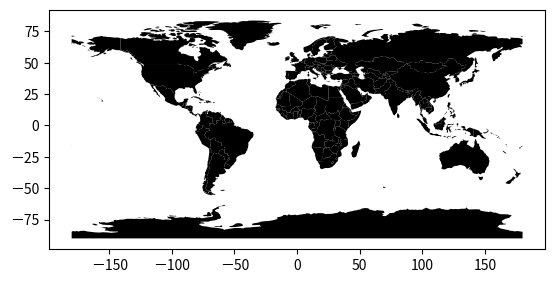

In [37]:
# 讀取 shape 檔，國家
world = gpd.read_file(path+"shape/countries.shp")
world=world[['iso_a3','geometry']]
world.plot(color="black")

In [38]:
# 有值方保留
gdf=world.merge(df_wide, on=['iso_a3'])
gdf

,iso_a3,geometry,CountryName,continent,region2,Stri2001,case2001,death2001,gdpc2001,demo2001,...,demo2204,educ2204,ferti2204,Stri2205,case2205,death2205,gdpc2205,demo2205,educ2205,ferti2205
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,Oceania,Oceania,3.583871,0.000000e+00,0.0,38896.70,0.3044,...,0.3044,8.248,2.77,57.410000,0.001051,0.000000e+00,38896.70,0.3044,8.248,2.77
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,Africa,Eastern Africa,0.179355,0.000000e+00,0.0,2874.96,0.3272,...,0.3272,3.645,4.89,30.560000,0.000000,0.000000e+00,2874.96,0.3272,3.645,4.89
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,North America,North America,0.896774,1.199293e-06,0.0,44868.74,0.7514,...,0.7514,13.080,1.50,42.590000,0.015499,1.946710e-04,44868.74,0.7514,13.080,1.50
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,North America,North America,0.000000,2.377308e-07,0.0,55334.74,0.6678,...,0.6678,13.610,1.73,75.000000,0.022366,1.655334e-04,55334.74,0.6678,13.610,1.73
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,Asia,Central Asia,0.806129,0.000000e+00,0.0,25307.56,0.1546,...,0.1546,11.748,2.84,45.370000,0.000094,7.816439e-07,25307.56,0.1546,11.748,2.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,RWA,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",Rwanda,Africa,Eastern Africa,4.390645,0.000000e+00,0.0,1929.29,0.1664,...,0.1664,3.478,4.04,46.300000,0.000050,0.000000e+00,1929.29,0.1664,3.478,4.04
159,BIH,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",Bosnia and Herzegovina,Europe,Southern Europe,0.000000,0.000000e+00,0.0,10460.52,0.3868,...,0.3868,11.280,1.27,36.110000,0.000812,1.289352e-05,10460.52,0.3868,11.280,1.27
160,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,Europe,Southern Europe,0.896774,0.000000e+00,0.0,14124.12,0.2736,...,0.2736,1.636,1.49,11.727778,0.006801,6.751975e-05,14124.12,0.2736,1.636,1.49
161,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,South America,Caribbean,0.537419,0.000000e+00,0.0,28549.41,0.6352,...,0.6352,9.551,1.73,35.190000,0.034618,1.850138e-04,28549.41,0.6352,9.551,1.73


In [39]:
gdf= gdf.dropna()
len(gdf)

163

In [40]:
# save shape
gdf.to_file(pth+"shape/covid19_data_panel.shp")

<ipython-input-40-37f7419cdae8>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(pth+"shape/covid19_data_panel.shp")


## 讀取地圖寬表 panel_month.shp

In [41]:
# 直接讀取 shape #################################
gdf = gpd.read_file(path+"shape/covid19_data_panel.shp")
# 注意，讀取 shape 檔，數字變數會轉為字串
# 所有的數字欄都轉換回數字
col=gdf.columns
for c in col:
  try:       # 非數字欄會出現 error
    gdf[c]=gdf[c].astype(float)
  except:
    pass
gdf

,iso_a3,CountryNam,continent,region2,Stri2001,case2001,death2001,gdpc2001,demo2001,educ2001,...,educ2204,ferti2204,Stri2205,case2205,death2205,gdpc2205,demo2205,educ2205,ferti2205,geometry
0,FJI,Fiji,Oceania,Oceania,3.583871,0.000000e+00,0.0,38896.70,0.3044,8.248,...,8.248,2.77,57.410000,0.001051,0.000000e+00,38896.70,0.3044,8.248,2.77,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,Tanzania,Africa,Eastern Africa,0.179355,0.000000e+00,0.0,2874.96,0.3272,3.645,...,3.645,4.89,30.560000,0.000000,0.000000e+00,2874.96,0.3272,3.645,4.89,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,CAN,Canada,North America,North America,0.896774,1.199293e-06,0.0,44868.74,0.7514,13.080,...,13.080,1.50,42.590000,0.015499,1.946710e-04,44868.74,0.7514,13.080,1.50,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
3,USA,United States,North America,North America,0.000000,2.377308e-07,0.0,55334.74,0.6678,13.610,...,13.610,1.73,75.000000,0.022366,1.655334e-04,55334.74,0.6678,13.610,1.73,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
4,KAZ,Kazakhstan,Asia,Central Asia,0.806129,0.000000e+00,0.0,25307.56,0.1546,11.748,...,11.748,2.84,45.370000,0.000094,7.816439e-07,25307.56,0.1546,11.748,2.84,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,RWA,Rwanda,Africa,Eastern Africa,4.390645,0.000000e+00,0.0,1929.29,0.1664,3.478,...,3.478,4.04,46.300000,0.000050,0.000000e+00,1929.29,0.1664,3.478,4.04,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891..."
159,BIH,Bosnia and Herzegovina,Europe,Southern Europe,0.000000,0.000000e+00,0.0,10460.52,0.3868,11.280,...,11.280,1.27,36.110000,0.000812,1.289352e-05,10460.52,0.3868,11.280,1.27,"POLYGON ((18.56000 42.65000, 17.67492 43.02856..."
160,SRB,Serbia,Europe,Southern Europe,0.896774,0.000000e+00,0.0,14124.12,0.2736,1.636,...,1.636,1.49,11.727778,0.006801,6.751975e-05,14124.12,0.2736,1.636,1.49,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
161,TTO,Trinidad and Tobago,South America,Caribbean,0.537419,0.000000e+00,0.0,28549.41,0.6352,9.551,...,9.551,1.73,35.190000,0.034618,1.850138e-04,28549.41,0.6352,9.551,1.73,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


# pooled

In [42]:
# 用長表跑 pooled
df_m

,CountryName,iso_a3,ym,continent,region2,Stri,case,death,gdpc,demo,educ,ferti
0,Afghanistan,AFG,202001,Asia,Southern Asia,0.000000,0.000000e+00,0.000000e+00,1934.56,0.228,3.813,4.47
1,Afghanistan,AFG,202002,Asia,Southern Asia,2.010690,4.638222e-07,0.000000e+00,1934.56,0.228,3.813,4.47
2,Afghanistan,AFG,202003,Asia,Southern Asia,40.831935,1.397152e-05,3.471186e-07,1934.56,0.228,3.813,4.47
3,Afghanistan,AFG,202004,Asia,Southern Asia,80.740000,1.489457e-04,5.021649e-06,1934.56,0.228,3.813,4.47
4,Afghanistan,AFG,202005,Asia,Southern Asia,84.260000,1.158769e-03,1.683525e-05,1934.56,0.228,3.813,4.47
...,...,...,...,...,...,...,...,...,...,...,...,...
5418,Zimbabwe,ZWE,202201,Africa,Eastern Africa,44.145806,3.665695e-03,7.461860e-05,1611.41,0.210,7.918,3.62
5419,Zimbabwe,ZWE,202202,Africa,Eastern Africa,50.000000,1.660679e-03,1.409870e-05,1611.41,0.210,7.918,3.62
5420,Zimbabwe,ZWE,202203,Africa,Eastern Africa,56.090323,2.213089e-03,1.094704e-05,1611.41,0.210,7.918,3.62
5421,Zimbabwe,ZWE,202204,Africa,Eastern Africa,61.110000,3.668301e-04,5.771399e-06,1611.41,0.210,7.918,3.62


In [43]:
df_m.columns

Index(['CountryName', 'iso_a3', 'ym', 'continent', 'region2', 'Stri', 'case',
       'death', 'gdpc', 'demo', 'educ', 'ferti'],
      dtype='object')

## 各地區的疫情差異

Text(0.5, 1.0, 'bar chart of death, case')

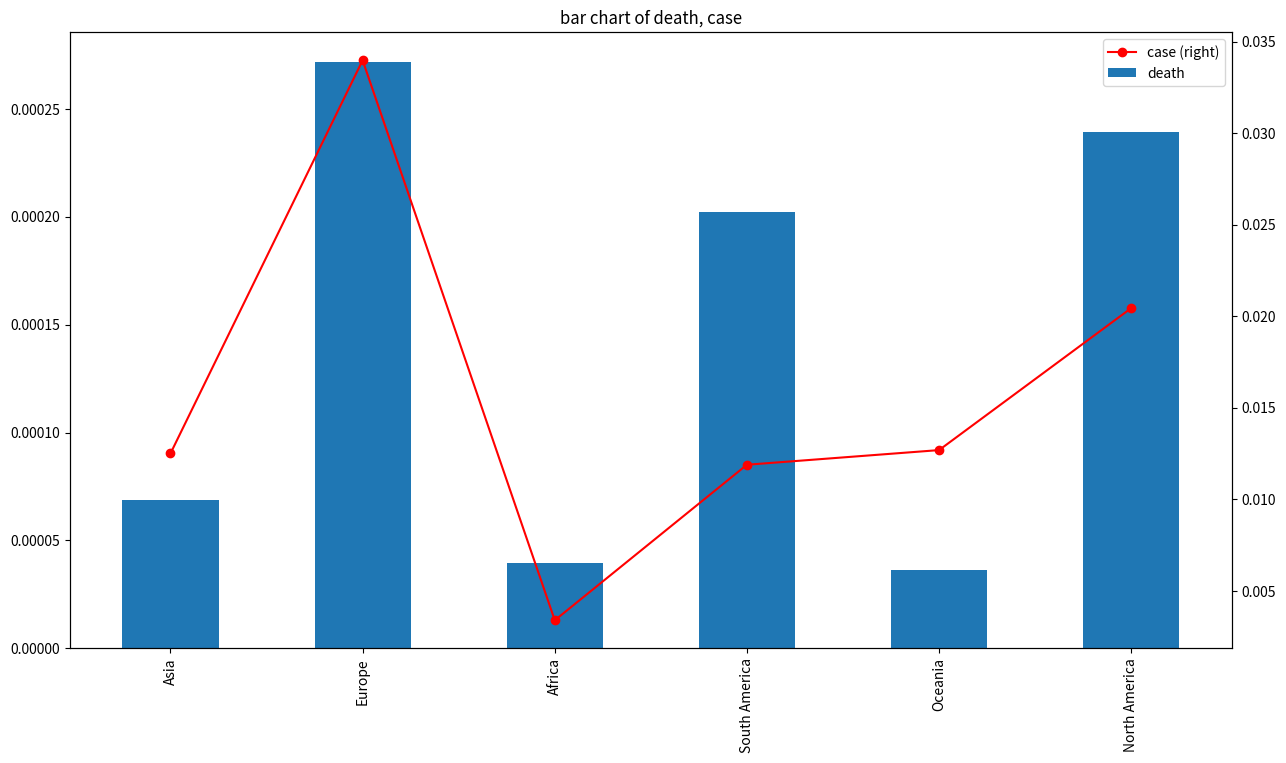

In [44]:
df_m=df_m.dropna(subset=['continent','region2'])
######################
variable1='death'
# geoupby 分群處理
cat='continent'
######################
sectors = df_m.groupby(cat)
category= df_m[cat].unique()

# 各群的比較
vari_mean=[]
for c in category:
    d=sectors.get_group(c)[variable1].mean()
    vari_mean.append(d)
###################
variable2='case'
# geoupby 分群處理
cat='continent'
###################
sectors = df_m.groupby(cat)
category= df_m[cat].unique()

# 各群的比較
vari_mean2=[]
for c in category:
    d=sectors.get_group(c)[variable2].mean()
    vari_mean2.append(d)

plt.figure(figsize=(15,8))
df_tem=pd.DataFrame(list(zip(vari_mean, vari_mean2)), columns=['death','case'],index=category)
ax=df_tem['case'].plot(secondary_y=True, x=df_tem.index, linestyle='-', marker='o', color='red', legend=True)
ax=df_tem['death'].plot(legend=True, kind='bar')
ax.autoscale(enable=True,axis='both', tight=False)
plt.title('bar chart of '+variable1+', '+variable2)

Text(0.5, 1.0, 'bar chart of death, case')

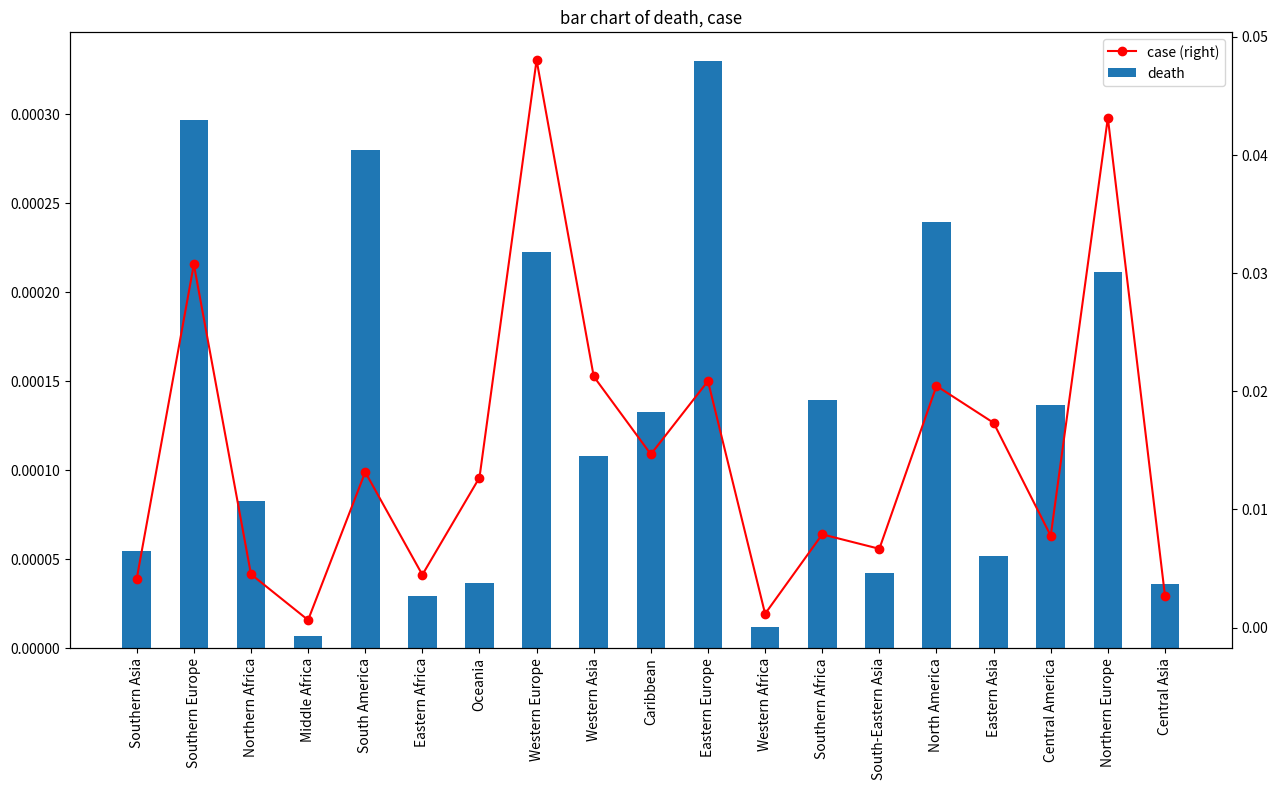

In [45]:
df=df.dropna(subset=['continent','region2'])
#########################
variable1='death'
# geoupby 分群處理
cat='region2'
#########################
sectors = df_m.groupby(cat)
category= df_m[cat].unique()

# 各群的比較
vari_mean=[]
for c in category:
    d=sectors.get_group(c)[variable1].mean()
    vari_mean.append(d)
#######################
variable2='case'
#######################
# geoupby 分群處理
sectors = df_m.groupby(cat)
category= df_m[cat].unique()

# 各群的比較
vari_mean2=[]
for c in category:
    d=sectors.get_group(c)[variable2].mean()
    vari_mean2.append(d)

plt.figure(figsize=(15,8))
df_tem=pd.DataFrame(list(zip(vari_mean, vari_mean2)), columns=['death','case'],index=category)
ax=df_tem['case'].plot(secondary_y=True, x=df_tem.index, linestyle='-', marker='o', color='red', legend=True)
ax=df_tem['death'].plot(legend=True, kind='bar')
ax.autoscale(enable=True,axis='both', tight=False)
plt.title('bar chart of '+variable1+', '+variable2)

## 空間虛擬變數

In [46]:
df_m['Europe']=df_m.continent.apply(lambda x:1 if x=='Europe' else 0)
df_m['Asia']=df_m.continent.apply(lambda x:1 if x=='Asia' else 0)
df_m['Africa']=df_m.continent.apply(lambda x:1 if x=='Africa' else 0)
df_m['North America']=df_m.continent.apply(lambda x:1 if x=='North America' else 0)
df_m['South America']=df_m.continent.apply(lambda x:1 if x=='South America' else 0)
df_m['Oceania']=df_m.continent.apply(lambda x:1 if x=='Oceania' else 0)

<ipython-input-46-d2acc0b9bca8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['Europe']=df_m.continent.apply(lambda x:1 if x=='Europe' else 0)
<ipython-input-46-d2acc0b9bca8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['Asia']=df_m.continent.apply(lambda x:1 if x=='Asia' else 0)
<ipython-input-46-d2acc0b9bca8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

## 時間虛擬變數

In [47]:
# ym 時間改為數字
df_m['ym'] = df_m['ym'].apply(lambda x: int(x))
df_m['2020']=df_m.ym.apply(lambda x:1 if x<=202012 else 0)
df_m['2021']=df_m.ym.apply(lambda x:1 if (x>=202101 and x<=202112) else 0)
df_m['2022']=df_m.ym.apply(lambda x:1 if x>=202201 else 0)

<ipython-input-47-0d165ea34136>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['ym'] = df_m['ym'].apply(lambda x: int(x))
<ipython-input-47-0d165ea34136>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['2020']=df_m.ym.apply(lambda x:1 if x<=202012 else 0)
<ipython-input-47-0d165ea34136>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [48]:
df

,Unnamed: 0.1,Unnamed: 0,CountryName,iso_a3,region2,continent,Date,C1,C2,C3,...,egaldem,libdem,partipdem,polyarchy,year,death_p,case_p,case_incp,death_incp,ym
863,863,863,Afghanistan,AFG,Southern Asia,Asia,20200101,0.0,0.0,0.0,...,0.142,0.192,0.151,0.366,2020.0,NaN,NaN,NaN,NaN,202001
864,864,864,Afghanistan,AFG,Southern Asia,Asia,20200102,0.0,0.0,0.0,...,0.142,0.192,0.151,0.366,2020.0,NaN,NaN,NaN,NaN,202001
865,865,865,Afghanistan,AFG,Southern Asia,Asia,20200103,0.0,0.0,0.0,...,0.142,0.192,0.151,0.366,2020.0,NaN,NaN,NaN,NaN,202001
866,866,866,Afghanistan,AFG,Southern Asia,Asia,20200104,0.0,0.0,0.0,...,0.142,0.192,0.151,0.366,2020.0,NaN,NaN,NaN,NaN,202001
867,867,867,Afghanistan,AFG,Southern Asia,Asia,20200105,0.0,0.0,0.0,...,0.142,0.192,0.151,0.366,2020.0,NaN,NaN,NaN,NaN,202001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161376,161376,161376,Zimbabwe,ZWE,Eastern Africa,Africa,20220508,NaN,NaN,NaN,...,0.173,0.192,0.193,0.288,2020.0,NaN,NaN,NaN,NaN,202205
161377,161377,161377,Zimbabwe,ZWE,Eastern Africa,Africa,20220509,NaN,NaN,NaN,...,0.173,0.192,0.193,0.288,2020.0,NaN,NaN,NaN,NaN,202205
161378,161378,161378,Zimbabwe,ZWE,Eastern Africa,Africa,20220510,NaN,NaN,NaN,...,0.173,0.192,0.193,0.288,2020.0,NaN,NaN,NaN,NaN,202205
161379,161379,161379,Zimbabwe,ZWE,Eastern Africa,Africa,20220511,NaN,NaN,NaN,...,0.173,0.192,0.193,0.288,2020.0,NaN,NaN,NaN,NaN,202205


## 交互作用項

In [49]:
df_m.columns

Index(['CountryName', 'iso_a3', 'ym', 'continent', 'region2', 'Stri', 'case',
       'death', 'gdpc', 'demo', 'educ', 'ferti', 'Europe', 'Asia', 'Africa',
       'North America', 'South America', 'Oceania', '2020', '2021', '2022'],
      dtype='object')

In [50]:
## 交互作用項
df_m['demo_gdp']=df_m['gdpc']*df_m['demo']

<ipython-input-50-b0d07e04af80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['demo_gdp']=df_m['gdpc']*df_m['demo']


## 政策改為前一期，避免內生


In [51]:
string=list(df.String)
string=[0]+string[:len(string)-1]
df_m.sti=string

<ipython-input-51-9250b9f66989>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_m.sti=string


## OLS 迴歸

In [52]:
df_m.columns

Index(['CountryName', 'iso_a3', 'ym', 'continent', 'region2', 'Stri', 'case',
       'death', 'gdpc', 'demo', 'educ', 'ferti', 'Europe', 'Asia', 'Africa',
       'North America', 'South America', 'Oceania', '2020', '2021', '2022',
       'demo_gdp'],
      dtype='object')

In [53]:
##########################################
dep='death'
ind=['Stri',"demo",'educ','gdpc','ferti']
title='covid19'
##########################################
df_m=df_m.dropna(subset=ind+[dep])
# 依變數
y=np.array(df_m[dep])
y.shape=(len(y),1)
# 自變數
X = []
for i in ind:
    X.append(np.array(df_m[i]))
X = np.array(X).T
# 迴歸建模
ols = OLS(y, X, name_y=dep, name_x=ind, name_ds=title, white_test=True)
# 輸出結果
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     covid19
Weights matrix      :        None
Dependent Variable  :       death                Number of Observations:        5422
Mean dependent var  :      0.0001                Number of Variables   :           6
S.D. dependent var  :      0.0003                Degrees of Freedom    :        5416
R-squared           :      0.1520
Adjusted R-squared  :      0.1512
Sum squared residual: 0.000324769                F-statistic           :    194.1773
Sigma-square        :       0.000                Prob(F-statistic)     :  7.559e-191
S.E. of regression  :       0.000                Log likelihood        :   37392.118
Sigma-square ML     :       0.000                Akaike info criterion :  -74772.237
S.E of regression ML:      0.0002                Schwarz criterion     :  -74732.647

------------------------------------------------------------

In [54]:
##########################################
dep='death'
ind=['Stri',"demo",'educ','gdpc','ferti','Europe', 'Asia', 'Africa',
       'North America', 'South America']
title='covid19'
##########################################
df_m=df_m.dropna(subset=ind+[dep])
# 依變數
y=np.array(df_m[dep])
y.shape=(len(y),1)
# 自變數
X = []
for i in ind:
    X.append(np.array(df_m[i]))
X = np.array(X).T
# 迴歸建模
ols = OLS(y, X, name_y=dep, name_x=ind, name_ds=title, white_test=True)
# 輸出結果
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     covid19
Weights matrix      :        None
Dependent Variable  :       death                Number of Observations:        5422
Mean dependent var  :      0.0001                Number of Variables   :          11
S.D. dependent var  :      0.0003                Degrees of Freedom    :        5411
R-squared           :      0.1930
Adjusted R-squared  :      0.1915
Sum squared residual: 0.000309089                F-statistic           :    129.3696
Sigma-square        :       0.000                Prob(F-statistic)     :  4.061e-243
S.E. of regression  :       0.000                Log likelihood        :   37526.272
Sigma-square ML     :       0.000                Akaike info criterion :  -75030.544
S.E of regression ML:      0.0002                Schwarz criterion     :  -74957.964

------------------------------------------------------------

In [55]:
##########################################
dep='death'
ind=['Stri',"demo",'educ','gdpc','ferti','Europe', 'Asia', 'Africa',
      'North America', 'South America', '2021', '2022']
title='covid19'
##########################################
df_m=df_m.dropna(subset=ind+[dep])
# 依變數
y=np.array(df_m[dep])
y.shape=(len(y),1)
# 自變數
X = []
for i in ind:
    X.append(np.array(df_m[i]))
X = np.array(X).T
# 迴歸建模
ols = OLS(y, X, name_y=dep, name_x=ind, name_ds=title, white_test=True)
# 輸出結果
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     covid19
Weights matrix      :        None
Dependent Variable  :       death                Number of Observations:        5422
Mean dependent var  :      0.0001                Number of Variables   :          13
S.D. dependent var  :      0.0003                Degrees of Freedom    :        5409
R-squared           :      0.2246
Adjusted R-squared  :      0.2228
Sum squared residual: 0.000296983                F-statistic           :    130.5349
Sigma-square        :       0.000                Prob(F-statistic)     :  1.325e-287
S.E. of regression  :       0.000                Log likelihood        :   37634.587
Sigma-square ML     :       0.000                Akaike info criterion :  -75243.174
S.E of regression ML:      0.0002                Schwarz criterion     :  -75157.397

------------------------------------------------------------

# weight

## queen

In [56]:
# queen 鄰近矩陣
w_queen =  lps.weights.Queen.from_dataframe(gdf)
# 列標準化
w_queen.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 127, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 132, ' is an island (no neighbors)')
('WARNING: ', 136, ' is an island (no neighbors)')
('WARNING: ', 139, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 151, ' is an island (no neighbors)')
('WARNING: ', 161, ' is an island (no neighbors)')


<ipython-input-56-f75bf622b6bb>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen =  lps.weights.Queen.from_dataframe(gdf)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 22 disconnected components.
 There are 19 islands with ids: 0, 18, 20, 42, 43, 44, 73, 84, 90, 127, 128, 129, 130, 132, 136, 139, 147, 151, 161.
  W.__init__(self, neighbors, ids=ids, **kw)


## rook

In [57]:
w_rook =  lps.weights.Rook.from_dataframe(gdf)
# 列標準化
w_rook.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 127, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 132, ' is an island (no neighbors)')
('WARNING: ', 136, ' is an island (no neighbors)')
('WARNING: ', 139, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 151, ' is an island (no neighbors)')
('WARNING: ', 161, ' is an island (no neighbors)')


<ipython-input-57-a8adb3bcf095>:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_rook =  lps.weights.Rook.from_dataframe(gdf)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 22 disconnected components.
 There are 19 islands with ids: 0, 18, 20, 42, 43, 44, 73, 84, 90, 127, 128, 129, 130, 132, 136, 139, 147, 151, 161.
  W.__init__(self, neighbors, ids=ids, **kw)


## Knn

In [58]:
# wnn5 鄰近矩陣
w_knn5 =  lps.weights.KNN.from_dataframe(gdf,k=5)
# 列標準化
w_knn5.transform = 'r'

/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


## Kernel 鄰近矩陣

In [59]:
# Kernel 鄰近矩陣
w_kernel =  lps.weights.Kernel.from_dataframe(gdf,bandwidth=15.0)
# 列標準化
w_kernel.transform = 'r'

/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:563: UserWarning: The weights matrix is not fully connected: 
 There are 12 disconnected components.
  W.__init__(self, neighbors, weights, ids, **kwargs)


In [60]:
w_kernel.symmetrize()

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:1296: UserWarning: The weights matrix is not fully connected: 
 There are 12 disconnected components.
  out_w = W(neighbors, weights, id_order=self.id_order)


## DistanceBand 鄰近矩陣

In [61]:
# DistanceBand 鄰近矩陣
w_dis =  lps.weights.DistanceBand.from_dataframe(gdf,threshold=10,binary=False,alpha=-2.)
# 列標準化
w_dis.transform = 'r'

('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 91, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 131, ' is an island (no neighbors)')
('WARNING: ', 132, ' is an island (no neighbors)')
('WARNING: ', 136, ' is an island (no neighbors)')
('WARNING: ', 139, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 154, ' is an island (no neighbo

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_data.py:132: RuntimeWarning: divide by zero encountered in power
  return self._with_data(data ** n)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 27 disconnected components.
 There are 20 islands with ids: 2, 3, 6, 17, 20, 21, 24, 26, 73, 90, 91, 128, 129, 130, 131, 132, 136, 139, 147, 154.
  w = W(neighbors, weights, ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 27 disconnected components.
 There are 20 islands with ids: 2, 3, 6, 17, 20, 21, 24, 26, 73, 90, 91, 128, 129, 130, 131, 132, 136, 139, 147, 154.
  W.__init__(


# fixed effect

In [62]:
# 所有變數名稱
gdf.columns

Index(['iso_a3', 'CountryNam', 'continent', 'region2', 'Stri2001', 'case2001',
       'death2001', 'gdpc2001', 'demo2001', 'educ2001',
       ...
       'educ2204', 'ferti2204', 'Stri2205', 'case2205', 'death2205',
       'gdpc2205', 'demo2205', 'educ2205', 'ferti2205', 'geometry'],
      dtype='object', length=208)

In [63]:
sim

['CountryName',
 'iso_a3',
 'ym',
 'continent',
 'region2',
 'Stri',
 'case',
 'death',
 'gdpc',
 'demo',
 'educ',
 'ferti']

In [64]:
countryname=gdf.CountryNam

In [65]:
ym=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110]
# ym=[2101,2102,2103,2104,2105,2106,2107,2108,2109,2110]
name_y=["death"]
vari_y=[]
for m in ym:
    for v in name_y:
        vari_y.append(v+str(m))
vari_y

['death2001',
 'death2002',
 'death2003',
 'death2004',
 'death2005',
 'death2006',
 'death2007',
 'death2008',
 'death2009',
 'death2010',
 'death2011',
 'death2012',
 'death2101',
 'death2102',
 'death2103',
 'death2104',
 'death2105',
 'death2106',
 'death2107',
 'death2108',
 'death2109',
 'death2110']

In [66]:
# 去除與地區有關與時間無關的變數，否則會出現 error
name_x=['Stri','case']
vari_x=[]
for v in name_x:
    for m in ym:
        vari_x.append(v+str(m))
vari_x

['Stri2001',
 'Stri2002',
 'Stri2003',
 'Stri2004',
 'Stri2005',
 'Stri2006',
 'Stri2007',
 'Stri2008',
 'Stri2009',
 'Stri2010',
 'Stri2011',
 'Stri2012',
 'Stri2101',
 'Stri2102',
 'Stri2103',
 'Stri2104',
 'Stri2105',
 'Stri2106',
 'Stri2107',
 'Stri2108',
 'Stri2109',
 'Stri2110',
 'case2001',
 'case2002',
 'case2003',
 'case2004',
 'case2005',
 'case2006',
 'case2007',
 'case2008',
 'case2009',
 'case2010',
 'case2011',
 'case2012',
 'case2101',
 'case2102',
 'case2103',
 'case2104',
 'case2105',
 'case2106',
 'case2107',
 'case2108',
 'case2109',
 'case2110']

In [67]:
# y 變數個數與觀察值數
y=gdf[vari_y].values
print (len(y[0]))
print (len(y))
print (y.mean())

# x 變數個數與觀察值數
x=gdf[vari_x].values
print (len(x[0]))
print (len(x))

22
163
0.00013051370973476045
44
163


In [68]:
y=y*1000
y.mean()

0.13051370973476045

In [69]:
x[0]

array([3.58387097e+00, 1.88655172e+01, 4.66825806e+01, 8.51850000e+01,
       7.49719355e+01, 6.75620000e+01, 5.38816129e+01, 5.18500000e+01,
       5.18500000e+01, 4.91596774e+01, 4.90700000e+01, 4.90700000e+01,
       4.90700000e+01, 4.90700000e+01, 4.90700000e+01, 5.70393333e+01,
       6.18609677e+01, 6.75900000e+01, 6.75900000e+01, 8.43177419e+01,
       8.76853333e+01, 9.05609677e+01, 0.00000000e+00, 0.00000000e+00,
       1.82561886e-05, 4.90482933e-05, 0.00000000e+00, 0.00000000e+00,
       3.28611394e-05, 3.65123772e-06, 1.50917826e-05, 7.30247543e-06,
       3.01835651e-05, 2.55586640e-05, 2.19074263e-05, 1.61697670e-05,
       2.92099017e-05, 1.88647282e-04, 1.17204731e-03, 1.50163236e-02,
       9.26063422e-02, 6.18337107e-02, 1.62500769e-02, 4.08208377e-03])

## spatial lag, fixed effect

In [70]:
w=w_queen
name_w = "w_queen"
name_ds='covid_death'
fe_lag = spreg.Panel_FE_Lag(y, x, w,name_w=name_w, name_y=name_y, name_x=name_x, name_ds=name_ds)
print(fe_lag .summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG PANEL - FIXED EFFECTS
-----------------------------------------------------------------------
Data set            : covid_death
Weights matrix      :     w_queen
Dependent Variable  :       death                Number of Observations:        3586
Mean dependent var  :      0.0000                Number of Variables   :           3
S.D. dependent var  :      0.2315                Degrees of Freedom    :        3583
Pseudo R-squared    :      0.5716
Spatial Pseudo R-squared:  0.5182
Sigma-square ML     :       0.023                Log likelihood        :  -13057.732
S.E of regression   :       0.152                Akaike info criterion :   26121.464
                                                 Schwarz criterion     :   26140.019

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------

#一、模型1：空間滯後面板模型 - 固定效應 (Maximum Likelihood Spatial Lag Panel - Fixed Effects)

# 意義：
# 1. 模型擬合度：

* Pseudo R-squared 為 0.5716，表示模型解釋了約 57.16% 的變異。
空間 Pseudo R-squared 為 0.5182，考慮了空間影響後，解釋了約 51.82% 的變異。

# 2. 變數影響：

* Stri 的係數為 0.0009553，表示每單位 Stri 增加，死亡數 (death) 增加 0.0009553 單位，顯著性極高 (p < 0.0001)。
case 的係數為 9.5789652，表示每單位 case 增加，死亡數增加 9.5789652 單位，顯著性極高 (p < 0.0001)。

* W_death 的係數為 0.3573347，表示死亡數在空間上具有顯著的滯後效應，顯著性極高 (p < 0.0001)。


## spatial error, fixed effect

In [71]:
fe_error = spreg.Panel_FE_Error(y, x, w,name_w=name_w, name_y=name_y, name_x=name_x, name_ds=name_ds)
print(fe_error .summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR PANEL - FIXED EFFECTS
-------------------------------------------------------------------------
Data set            : covid_death
Weights matrix      :     w_queen
Dependent Variable  :       death                Number of Observations:        3586
Mean dependent var  :      0.0000                Number of Variables   :           2
S.D. dependent var  :      0.2315                Degrees of Freedom    :        3584
Pseudo R-squared    :      0.4895
Sigma-square ML     :       0.024                Log likelihood        :  -13128.365
S.E of regression   :       0.154                Akaike info criterion :   26260.731
                                                 Schwarz criterion     :   26273.100

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------

# 二、 模型2：空間誤差面板模型 - 固定效應 (Maximum Likelihood Spatial Error Panel - Fixed Effects)

# 意義：

# 1. 模型擬合度：

* Pseudo R-squared 為 0.4895，表示模型解釋了約 48.95% 的變異。

# 2. 變數影響：

* Stri 的係數為 0.0014962，表示每單位 Stri 增加，死亡數 (death) 增加 0.0014962 單位，顯著性極高 (p < 0.0001)。


* case 的係數為 10.2858224，表示每單位 case 增加，死亡數增加 10.2858224 單位，顯著性極高 (p < 0.0001)。

* lambda 參數為 0.3893775，顯示誤差項之間存在顯著的空間相關性，顯著性極高 (p < 0.0001)。


# random effect

## spatial lag, random effect

In [72]:
re_lag = spreg.Panel_RE_Lag(y, x, w, name_y=name_y, name_x=name_x, name_ds=name_ds)
print(re_lag .summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG PANEL - RANDOM EFFECTS
------------------------------------------------------------------------
Data set            : covid_death
Weights matrix      :     unknown
Dependent Variable  :       death                Number of Observations:        3586
Mean dependent var  :      0.0462                Number of Variables   :           4
S.D. dependent var  :      0.2372                Degrees of Freedom    :        3582
Pseudo R-squared    :      0.5726
Spatial Pseudo R-squared:  0.5202
Sigma-square ML     :       0.024                Log likelihood        :    1534.187
S.E of regression   :       0.155                Akaike info criterion :   -3060.374
                                                 Schwarz criterion     :   -3035.635

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------

# 三、模型3：空間滯後面板模型 - 隨機效應 (Maximum Likelihood Spatial Lag Panel - Random Effects)

# 意義：
# 1. 模型擬合度：

* Pseudo R-squared 為 0.5726，表示模型解釋了約 57.26% 的變異。
空間 Pseudo R-squared 為 0.5202，考慮了空間影響後，解釋了約 52.02% 的變異。

# 2. 變數影響：

* CONSTANT 的係數為 -0.0358290，表示模型的截距，顯著性高 (p = 0.0002313)。
Stri 的係數為 0.0009610，表示每單位 Stri 增加，死亡數 (death) 增加 0.0009610 單位，顯著性極高 (p < 0.0001)。
* case 的係數為 9.5684858，表示每單位 case 增加，死亡數增加 9.5684858 單位，顯著性極高 (p < 0.0001)。
* W_death 的係數為 0.3582540，表示死亡數在空間上具有顯著的滯後效應，顯著性極高 (p < 0.0001)。
phi 參數為 0.3536167，表示存在顯著的隨機效應，顯著性極高 (p < 0.0001)。


# 政策嚴格程度 (Stri) 的影響：

# 所有三個模型都顯示出政策嚴格程度對死亡數有顯著的正向影響，表明嚴格的防疫政策可能有效減少 COVID-19 的死亡數。

# 1. 病例數 (case) 的影響：

* 三個模型中，病例數對死亡數都有非常顯著的正向影響，這意味著病例數的增加會直接導致死亡數的增加。
空間效應的影響：

* 在空間滯後模型中，鄰近地區的死亡數對當地死亡數有顯著的正向影響，表明疫情的擴散具有空間相關性。
在空間誤差模型中，誤差項之間存在顯著的空間相關性 (lambda)，這表明存在其他未考慮到的空間相關因素影響死亡數。

# 2. 固定效應與隨機效應的比較：

* 固定效應模型（模型1和模型2）假設每個地區的特性是固定不變的，能夠更好地控制地區內部的異質性。
隨機效應模型（模型3）假設每個地區的特性是隨機的，能夠解釋地區之間的變異性。隨機效應模型中 phi 參數顯示存在顯著的隨機效應。

# 3. 綜合結論
* 這三個模型共同表明，政策嚴格程度和病例數是影響 COVID-19 死亡數的主要因素。此外，空間相關性也在一定程度上影響了死亡數，這意味著疫情控制措施需要考慮地區之間的相互影響。固定效應模型適合分析各地區內部的特性，而隨機效應模型更能捕捉地區之間的變異性。綜合這些模型的結果，決策者可以更好地制定針對性的防疫政策，並考慮不同地區的特性和相互影響。



# Comprehensive Conclusion
* These three models collectively indicate that the stringency of policies and the number of cases are the primary factors influencing the number of COVID-19 deaths. Additionally, spatial correlation also affects the number of deaths to a certain extent, implying that pandemic control measures need to consider the interactions between regions. The fixed effects model is suitable for analyzing the characteristics within each region, while the random effects model can better capture the variability between regions. By synthesizing the results of these models, policymakers can formulate more targeted anti-pandemic policies, taking into account the unique characteristics and interactions of different regions.
